# test cls

In [1]:
'''
Need to re-run cosmosis and measurements

It should be fast, though.

python test_Dirac_cl_final.py


source /dvs_ro/cfs/projectdirs/des/zuntz/cosmosis-global/setup-cosmosis3
/global/cfs/cdirs/des/mxlin/temp
'''

'\nNeed to re-run cosmosis and measurements.\n\nIt should be fast, though.\n\npython test_Dirac_cl_final.py\n\n\nsource /dvs_ro/cfs/projectdirs/des/zuntz/cosmosis-global/setup-cosmosis3\n/global/cfs/cdirs/des/mxlin/temp\n'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cosmolopy
import h5py as h5
import numpy as np
import healpy as hp
from Moments_analysis import convert_to_pix_coord, make_covariance
from Moments_analysis import moments_map
import pyfits as pf
import cosmolopy.distance as cd
import pickle
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol = 2)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')

import healpy as hp

'''
This notebook checks if the modelling of the mask effects is adequate.

'''
mask_ = load_obj('/global/cfs/cdirs/des/mass_maps/Maps_final/mask_DES_y3_512')
            

/global/homes/m/mgatti/.conda/envs/bfd_env3/lib/python3.6/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


missing pys2let
missing pywph


In [3]:
import numpy as np
import glob 
import scipy 
from  scipy.interpolate import interp1d
files_ = glob.glob('/global/cfs/cdirs/des/mgatti/Dirac/output_moments_new_dirac_C///*')
files = []
for f in files_:
    if 'noiserel30' in f and 'rel0.' in f:
        files.append(f)

run_count = 0
f = 0
training_points = len(files)


In [6]:
#output_predictions = '/global/cfs/cdirs/des/mgatti/Dirac/output_folder_cl_predictions_Dirac_sept23/'
output_predictions2 = '/global/cfs/cdirs/des/mgatti/Dirac/output_folder_cl_predictions_Dirac_sept23/'
output_predictions = '/global/cfs/cdirs/des/mgatti/Dirac/output_folder_cl_predictions_Dirac_sept23_2_noz25/'



output_measurements= '/pscratch/sd/m/mgatti/pseudo_cl_test_Dirac_sept23/'
output_measurements2= '/pscratch/sd/m/mgatti/pseudo_cl_test_Dirac_sept23/'
#output_measurements2= '/pscratch/sd/m/mgatti/pseudo_cl_test_Dirac_sept23_3/'

#M = np.load('/pscratch/sd/m/mgatti/pseudo_cl_test_Dirac1/M512_2.npy',allow_pickle=True)
#MEE=M[:999,:][:,:999]
#                          fl = np.matmul(fl,MEE.T)*msh[b-1]*msh[b-1]
                                #

In [23]:
u = pf.open('/global/cfs/cdirs/des/mgatti/Dirac_mocks_2/runsC/run004/kappa_84_512.fits')
u1 = pf.open('/global/cfs/cdirs/des/mgatti/Dirac_mocks/runsC/run004/kappa_84_512.fits')

In [24]:
u[1].data['T']/u1[1].data['T']

array([0.99491954, 0.99482006, 0.99488754, ..., 0.99480379, 0.9949266 ,
       0.99482813])

In [11]:
folders = ['C','E','I','J','K','L','M','N','O','P','Q','R','S']
params_ref = dict()
for fold in folders:
    params_ref[fold] = dict()
    
    f = open(('/global/homes/m/mgatti/Mass_Mapping/peaks/params_run_1_Niall_{0}.txt'.format(fold)),'r')
    mv_ = []
    h_ = []
    ob_ = []
    ns_ = []
    w_ = []
    om_ =[]
    sigma8_ = []
    for i,f_ in enumerate(f):
        if i>0:
            ns_.append(float(f_.split(',')[5]))

            h_.append(float(f_.split(',')[4]))
            om_.append(float(f_.split(',')[0]))
            ob_.append(float(f_.split(',')[3]))
            w_.append(float(f_.split(',')[2]))
            sigma8_.append(float(f_.split(',')[1]))
            try:
                mv_.append(float(f_.split(',')[6]))
            except:
                mv_.append(0.06)
        
    params_ref[fold]['om'] = np.array(om_)
    params_ref[fold]['sigma8'] = np.array(sigma8_)
    params_ref[fold]['h'] = np.array(h_)
    params_ref[fold]['w'] = np.array(w_)
    params_ref[fold]['ob'] = np.array(ob_)
    params_ref[fold]['ns'] = np.array(ns_)
    params_ref[fold]['mv'] = np.array(mv_)
    


In [38]:
import glob
import healpy as hp
import os
import scipy
from scipy.interpolate import interp1d
cl_pix = hp.sphtfunc.pixwin(512)


f = glob.glob(output_predictions+'/*')

ratios_ = dict()
for b in  range(1,5):
    ratios_[b] = []
    
ratios_old = dict()
for b in  range(1,5):
    ratios_old[b] = []
    
    
mv_ = []
h_ = []
ob_ = []
ns_ = []
w_ = []
om_ =[]
sigma_8_ = []   
for f_ in f[:]:
    folder_ = f_.split('runs')[1].split('_')[0]
    mock_number =  int(f_.split('run')[2].split('_')[0])
   # if folder_ != 'C':
    if os.path.exists(output_measurements+'/k_{0}_{1}.npy'.format(folder_,mock_number)):
            try:
                #'''
                # and now get the measurements
                m = np.load(output_measurements2+'/k_{0}_{1}.npy'.format(folder_,mock_number),allow_pickle=True).item()
                m_old = np.load(output_measurements+'/k_{0}_{1}.npy'.format(folder_,mock_number),allow_pickle=True).item()


                om_.append(params_ref[folder_]['om'][mock_number-1])
                sigma_8_.append(params_ref[folder_]['sigma8'][mock_number-1])
                ns_.append(params_ref[folder_]['ns'][mock_number-1])
                h_.append(params_ref[folder_]['h'][mock_number-1])
                w_.append(params_ref[folder_]['w'][mock_number-1])
                ob_.append(params_ref[folder_]['ob'][mock_number-1])
                for b in  range(1,5):
                    base = f_+'/shear_cl/bin_{0}_{0}.txt'.format(b)
                    base_l =  f_+'/shear_cl/ell.txt'
                    cl = np.loadtxt(base)
                    ell = np.loadtxt(base_l)
                    mask = ell< 30000
                    f = interp1d(ell[mask],(cl*ell)[mask])
                    ll = np.arange(1,2000)
#
                    theory = f(ll)[:999]*cl_pix[1:1000]**2/ll[:999]
                   # theory = f(ll)[1:1000]*cl_pix[1:1000]**2/ll[1:1000]
#
#
                    #if b ==1:
                    #    a = m['{0}_{0}'.format(b)][1:1000]*1.02/theory
                    #    a = savgol_filter(a, 9, 3)
                    #    ratios_[b].append(a)
                    #else:
                    ratios_[b].append(m['{0}_{0}'.format(b)][1:1000]/theory)


                #'''

                #m_old = np.load(output_measurements+'/k_{0}_{1}.npy'.format(folder_,mock_number),allow_pickle=True).item()

                # old
                f_1 = output_predictions2+f_.split(output_predictions)[1]
                
                folder_ = f_1.split('runs')[1].split('_')[0]
                mock_number =  int(f_1.split('run')[2].split('_')[0])
                # and now get the measurements



                for b in  range(1,5):
                    base = f_1+'/shear_cl/bin_{0}_{0}.txt'.format(b)
                    base_l =  f_1+'/shear_cl/ell.txt'
                    cl = np.loadtxt(base)
                    ell = np.loadtxt(base_l)
                    mask = ell< 30000
                    f = interp1d(ell[mask],(cl*ell)[mask])
                    ll = np.arange(1,2000)

                    theory = f(ll)[:999]*cl_pix[1:1000]**2/ll[:999]

                    ratios_old[b].append(m_old['{0}_{0}'.format(b)][1:1000]/theory)

                    
                    #theory = f(ll)[1:1000]*cl_pix[1:1000]**2/ll[1:1000]

                    #ratios_[b].append(m_old['{0}_{0}'.format(b)][1:1000]/theory)

            except:
                pass

In [41]:
print (np.array(ratios_old[1]).shape)

mask2 = ((np.array(om_)-0.3)**2 <0.1**2) & ((np.array(sigma_8_)-0.8)**2<0.1**2) & ((np.array(w_)+1)**2<0.3**2)
len(mask[mask])

mask2 = ((np.array(om_)-0.3)**2 <0.05**2) & ((np.array(sigma_8_)-0.8)**2<0.1**2) & ((np.array(w_)+1)**2<0.1**2)
len(mask[mask])
#mask = mask ==mask
mask = mask2 ==mask2
mask = np.arange(np.array(ratios_old[1]).shape[0]) == np.arange(np.array(ratios_old[1]).shape[0])

(512, 999)


In [47]:
rr = np.load('/pscratch/sd/m/mgatti/rr.npy',allow_pickle=True)

Text(0, 0.5, '$C_{\\ell}$ measured / $C_{\\ell}$ theory')

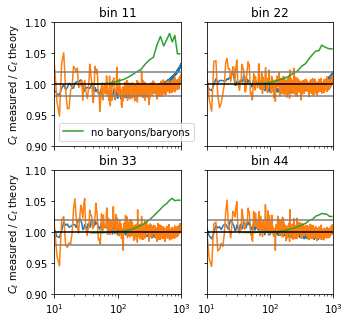

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(5,5.),sharex = True,sharey = True)
from scipy.signal import savgol_filter

                 
                
#om_t = np.array(om_t)
tomo_bin = 1
for i in range(2):
    for j in range(2):
       
    
            #err = np.std(np.array(ratio[tomo_bin])[:,:],axis=0)/np.sqrt(np.array(ratio[tomo_bin]).shape[0])
            #dx = savgol_filter(np.mean(np.array(ratio[tomo_bin])[:,:],axis=0), 5, 3)
            
            
            x,y = rr[tomo_bin-1]
            y[-1] = y[-2]
            y = 1/y
            #dx = np.median(np.array(ratios_[tomo_bin])[mask,:],axis=0)
            
            
            #ax[i,j].plot(ll[1:1000],dx) 
            
            uu = 1.
            #if tomo_bin ==1:
            #    uu = 1.02
            dx = np.mean(np.array(ratios_[tomo_bin])[:,:],axis=0)*uu
            dx = savgol_filter(dx, 5, 3)
            ax[i,j].plot(ll[1:1000],dx) 
            
            dx = np.mean(np.array(ratios_[tomo_bin])[mask2,:],axis=0)*uu
            dx = savgol_filter(dx, 5, 3)
            ax[i,j].plot(ll[1:1000],dx)  
            
            ax[i,j].plot(x,y,label = 'no baryons/baryons') 
            #dx = np.mean(np.array(ratios_[tomo_bin])[~mask2,:],axis=0)*uu
            #dx = savgol_filter(dx, 11, 3)
            #ax[i,j].plot(ll[1:1000],dx) 
            
            #dx = np.mean(np.array(ratios_old[tomo_bin])[:,:],axis=0)*uu
            #ax[i,j].plot(ll[1:1000],dx) 
            
            
            
            ax[i,j].plot(ll[1:1000],np.ones(len(ll[1:1000])),color ='black')
            ax[i,j].plot(ll[1:1000],1.02*np.ones(len(ll[1:1000])),color ='grey')
            ax[i,j].plot(ll[1:1000],0.98*np.ones(len(ll[1:1000])),color ='grey')

            ax[i,j].set_xscale('log')
            ax[i,j].set_xlim([10,1000])      
            ax[i,j].set_ylim([0.9,1.1])      
            ax[i,j].set_title('bin {0}{0}'.format(tomo_bin,tomo_bin))
            
            
            tomo_bin +=1
ax[0,0].legend()
ax[0,0].set_ylabel(r'$C_{\ell}$ measured / $C_{\ell}$ theory')   
ax[1,0].set_ylabel(r'$C_{\ell}$ measured / $C_{\ell}$ theory')